![image-2.png](attachment:image-2.png)

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import os
#os.chdir('/content/drive/MyDrive/Colab_Notebooks/data')

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [4]:
df = pd.read_csv("california_cities.csv")
df.head(5)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [6]:
df_sin_nulos = df.dropna().copy()

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente.

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [7]:
def pinta_diagramas(df,x_col_num,y_col_num,col_cat_opcional = None,size = None,scale = 1):
    f,axs = plt.subplots(figsize = (16,10))
    if isinstance(col_cat_opcional,str):
        size = scale*df[size]

    if col_cat_opcional is not None:
        sns.scatterplot(x = x_col_num, y = y_col_num,data = df, size = size, hue = col_cat_opcional);
    else:
        sns.scatterplot(x = x_col_num, y = y_col_num,data = df, size = size)
    plt.xlabel(x_col_num)
    plt.ylabel(y_col_num)






### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

![image.png](attachment:image.png)

In [8]:
longitud_x = df_sin_nulos["longd"]# numérica
latitud_y= df_sin_nulos["latd"]#numérica
tamaño_puntos = df_sin_nulos["area_total_km2"]#numérica
variacion_escala = np.log10
df_sin_nulos["poblacion_log"] = df_sin_nulos["population_total"].apply(lambda x: x*np.log10(x))
log_poblacion = df_sin_nulos["poblacion_log"]#numérica


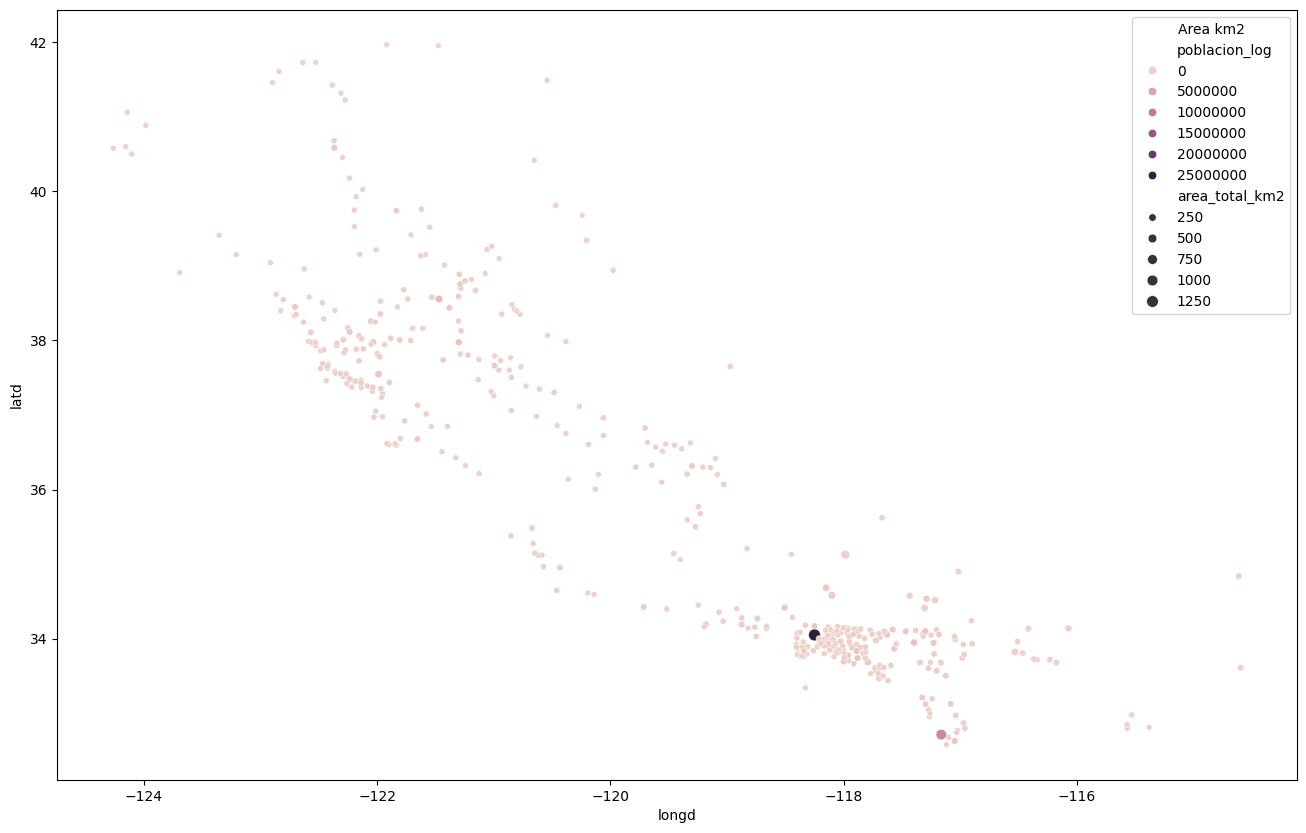

In [9]:
f,axs = plt.subplots(figsize = (16,10))
sns.scatterplot(x = longitud_x, y = latitud_y,data = df_sin_nulos, size = tamaño_puntos, hue = log_poblacion)
plt.legend(title="Area km2")
plt.show()

In [10]:
#pinta_diagramas(longitud_x,latitud_y,df,col_cat_opcional=log_poblacion,size = tamaño_puntos,scale =1)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [11]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df_titanic.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [13]:
# Pequeño ajuste de los datos nulos
df_titanic["edad_media"] = df_titanic.groupby("sex")["age"].transform("mean")

In [14]:
# Pequeño ajuste de los datos nulos
df_titanic["age"] = df_titanic.age.fillna(df_titanic["edad_media"]).round(2)

In [15]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
 15  edad_media   891 non-null    float64
dtypes: bool(2), float64(3), int64(4), object(7)
memory usage: 99.3+ KB


In [16]:
# Breve revisión de edades, máximos y mínimos
df_titanic.groupby("who")["age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
who,,,,,,,,
child,83.0,6.37,4.73,0.42,2.0,5.00,9.5,15.0
man,537.0,32.61,11.36,16.00,25.0,30.73,36.0,80.0
woman,271.0,31.20,10.43,16.00,24.0,27.92,36.0,63.0


1. Tasa de mortalidad

In [17]:
#Frecuencias absolutas
mortalidad_prov=df_titanic.alive.value_counts()
mortalidad_prov.loc["no"]

549

In [18]:
#Frecuencias relativas
mortalidad_prov=df_titanic.alive.value_counts(normalize=True)*100
mortalidad_prov.loc["no"]



61.61616161616161

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
proporcion_supervivientes = df_titanic.alive.value_counts(normalize=True)*100
df_titanic.alive.value_counts(normalize=True)*100

alive
no     61.616162
yes    38.383838
Name: proportion, dtype: float64

2. Según el género

In [21]:
# Frecuencias absolutas
mortalidad_prov=df_titanic.groupby("who")["alive"].value_counts()
mortalidad_prov[:,"yes"]


who
child     49
man       88
woman    205
Name: count, dtype: int64

In [22]:
# Frecuencias relativas
mortalidad_prov= df_titanic.groupby("who")["alive"].value_counts(normalize=True)*100
mortalidad_prov[:,"yes"]

who
child    59.036145
man      16.387337
woman    75.645756
Name: proportion, dtype: float64

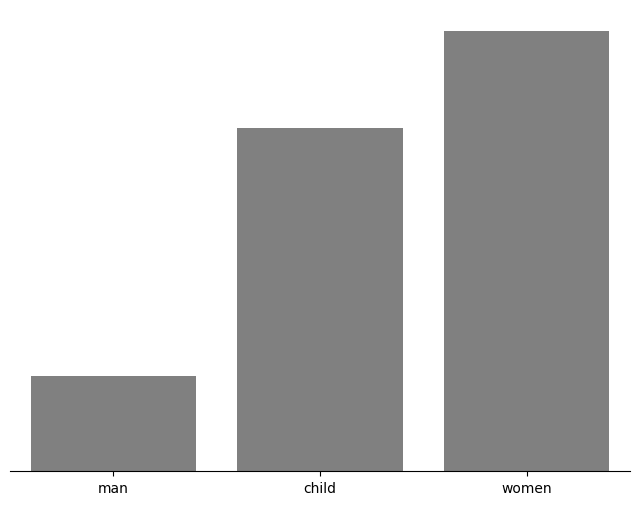

In [23]:
porcentaje_supervivencia ={"categorias":["man","child","women"],
                           "valores":[16.38,59,75.6]}


por_supervivencia=pd.DataFrame(porcentaje_supervivencia)
f,axs = plt.subplots(figsize=(8,6))
sns.barplot(x="categorias",y="valores",data = por_supervivencia, color="grey")
sns.despine(left=True, top=True,right=True)
axs.set_yticks([])
plt.xlabel("")
plt.ylabel("");


3. Clase

In [24]:
clase_prov=df_titanic.groupby("who").apply(lambda x: x[x["who"] == "man"].groupby("class")["alive"].value_counts(normalize=True)*100)
clase_prov.loc[:,:,"yes"]

who  class 
man  First     35.294118
     Second     8.080808
     Third     11.912226
Name: proportion, dtype: float64

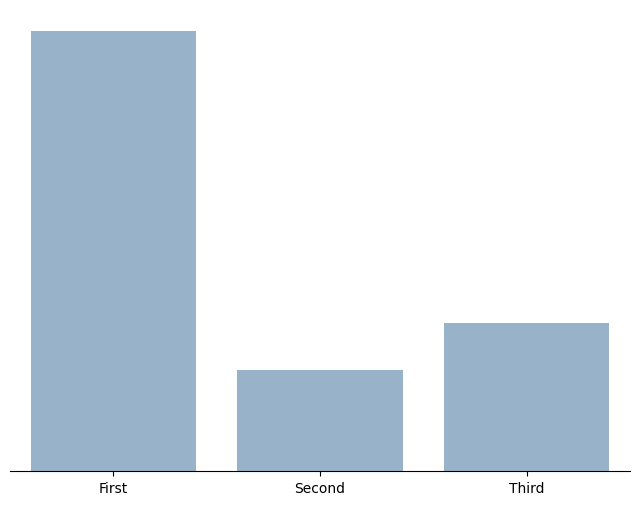

In [25]:
porcentaje_supervivencia ={"categorias":["First","Second","Third"],
                           "valores":[35.3,8.1,11.9]}


por_supervivencia=pd.DataFrame(porcentaje_supervivencia)
f,axs = plt.subplots(figsize=(8,6))
sns.barplot(x="categorias",y="valores",data = por_supervivencia, color="steelblue",alpha = 0.6)
sns.despine(left=True, top=True,right=True)
axs.set_yticks([])
plt.xlabel("")
plt.ylabel("");


4. Tasa supervivencia entre mujeres y niños

In [26]:
# Supervivencia de los niños según la clase en frecuenca absoluta
niños = df_titanic.loc[df_titanic["who"]=="child","class"].value_counts().sort_index()
niños

class
First      6
Second    19
Third     58
Name: count, dtype: int64

In [27]:
# Supervivencia de los niños según la clase en frecuenca relativa y ordenada por clase
niños = df_titanic.loc[df_titanic["who"]=="child","class"].value_counts(normalize=True).sort_index()
niños

class
First     0.072289
Second    0.228916
Third     0.698795
Name: proportion, dtype: float64

In [28]:
# Supervivencia de las mujeres según la clase en frecuenca absoluta
mujeres = df_titanic.loc[df_titanic["who"]=="woman","class"].value_counts().sort_index()
mujeres

class
First      91
Second     66
Third     114
Name: count, dtype: int64

In [29]:
# Supervivencia de las mujeres según la clase en frecuenca relativa y ordenada por clase
mujeres = df_titanic.loc[df_titanic["who"]=="woman","class"].value_counts(normalize=True).sort_values(ascending=True).sort_index()
mujeres

class
First     0.335793
Second    0.243542
Third     0.420664
Name: proportion, dtype: float64

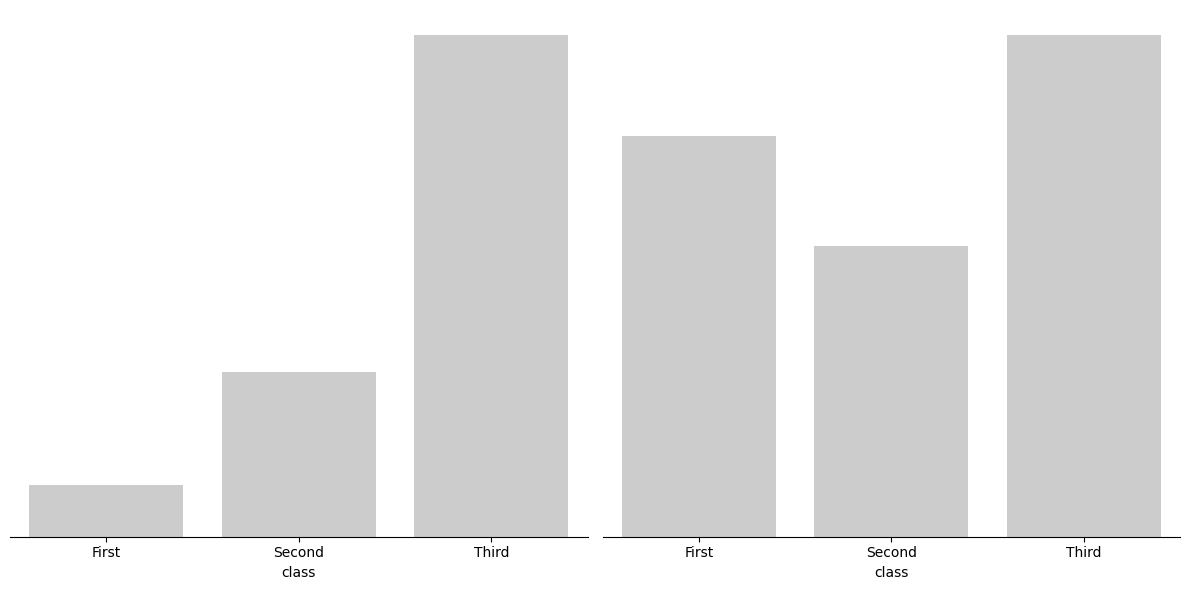

In [30]:
# Gráfico de frecuencas relativas de la supervivencia por clase de niños y mujeres

f, ax = plt.subplots(figsize=(12,6),nrows=1, ncols=2)
f.subplots_adjust(hspace=1)
sns.barplot(x=niños.index, y=niños.values, ax=ax[0],color="grey",alpha=0.4)
sns.despine(left=True, top=True,right=True)
ax[0].set_yticks([])
sns.barplot(x=mujeres.index, y=mujeres.values, ax=ax[1],color="grey",alpha=0.4)
sns.despine(left=True, top=True,right=True)
ax[1].set_yticks([])
plt.tight_layout()


5. Tipo de persona por puerto de embarque


In [35]:
sup_puerto = df_titanic.groupby(["embark_town"])["alive"].value_counts(normalize=True)*100
sup_puerto.loc[:,"yes"]

embark_town
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.695652
Name: proportion, dtype: float64

In [69]:
sup_puerto = df_titanic.groupby("embark_town")["class"].value_counts(normalize=True)*100
sup_puerto


embark_town  class 
Cherbourg    First     50.595238
             Third     39.285714
             Second    10.119048
Queenstown   Third     93.506494
             Second     3.896104
             First      2.597403
Southampton  Third     54.813665
             Second    25.465839
             First     19.720497
Name: proportion, dtype: float64

In [70]:
sup_puerto = df_titanic.groupby(["embark_town"])["who"].value_counts(normalize=True)*100
sup_puerto

embark_town  who  
Cherbourg    man      53.571429
             woman    35.714286
             child    10.714286
Queenstown   man      48.051948
             woman    45.454545
             child     6.493506
Southampton  man      63.664596
             woman    27.018634
             child     9.316770
Name: proportion, dtype: float64

Las coordenadas de las ciudades por las que pasó el Titanic y el lugar de su hundimiento son las siguientes:

1. Southampton, Reino Unido:
   - Latitud: 50.9097° N
   - Longitud: 1.4044° W

2. Cherburgo-Octeville, Francia:
   - Latitud: 49.6351° N
   - Longitud: 1.6221° W

3. Queenstown (ahora Cobh), Irlanda:
   - Latitud: 51.8503° N
   - Longitud: 8.2943° W

4. Lugar de hundimiento del Titanic:
   - Latitud: 41.7325° N
   - Longitud: 49.9469° W

Estas son las coordenadas aproximadas de las ciudades mencionadas y el lugar del hundimiento del Titanic.

In [32]:
import folium

# Crear un mapa centrado en una ubicación inicial
mapa_titanic = folium.Map(location=[51.8503, -8.2943], zoom_start=5,tiles="openstreetmap",zoom_control = False,overlay=False)

# Agregar marcadores para las ciudades
folium.Marker(location=[50.9097, -1.4044], popup='Southampton, Reino Unido', icon=folium.Icon(color='red', icon='ship')).add_to(mapa_titanic)
folium.Marker(location=[49.6351, -1.6221], popup='Cherburgo-Octeville, Francia', icon=folium.Icon(color='red', icon='ship')).add_to(mapa_titanic)
folium.Marker(location=[51.8503, -8.2943], popup='Queenstown (Cobh), Irlanda', icon=folium.Icon(color='red', icon='ship')).add_to(mapa_titanic)

# Mostrar el mapa
mapa_titanic